In [ ]:
import numpy as np
from numpy import linalg as LA
# https://numpy.org/doc/stable/reference/routines.linalg.html
# from statistics import
# https://numpy.org/doc/stable/reference/routines.statistics.html


import scipy
from scipy import linalg
# https://docs.scipy.org/doc/scipy/reference/linalg.html
from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/stats.html

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
"""Explorar estas dos funciones"""

"""tenemos una nube de puntos en el plano (x,y)"""


def pca (X,Y):
# reshaping la data para que tenga shape (n,1) venga
# de esa forma o venga (n,)
    lX = len(X)
    lY = len(Y)
    X = X.reshape((lX,1))
    Y = Y.reshape((lY,1))
# centramos la data, trasladandonos al sistema de
# coordenadas en el los mean() = 0
    X -= np.mean(X)
    Y -= np.mean(Y)
# construimos la matriz D a partir de la data X e Y
    D = np.concatenate((X, Y), axis=1)
# matriz A = matriz varianza/covarianza
    A = np.dot(np.transpose(D),D)/lX
# ver diferencia entre LA.eug() y LA.eigh()
    w, v = LA.eigh(A)
# v es la matriz cuyas columnas son los autovectores de
# A, ordenados de menor a mayor autovalor.
# Entonces la ultima columna corresponde al autovector
# con mayor autovalor. v[1,1]/v[0,1] es el cociente
# de la coordenada y / coordenada x de este autovector
# es decir, en el plano (x,y), es la pendiente de la recta
# mas cercana a los puntos. Que tambien es la recta que
# captura la mayor varianza.
    return w, v , v[1,1]/v[0,1]

def ls (X,Y):
    lX = len(X)
    lY = len(Y)
    X = X.reshape((lX,1))
    X -= np.mean(X)
    Y = Y.reshape((lY,1))
    Y -= np.mean(Y)
# Hacemos la regresion tratando de "explicar" a Y con X.
# Como hemos centrado la data, la ordenada al origen es cero,
# por lo que el problema en R^(nx1) (n es numero de datos)
# consiste en encontrar la coordenada del vector Y
# de la proyeccion ortogonal de Y en la direccion
# de X, en la base dada por X.
    b = np.dot(np.transpose(X),Y)/np.dot(np.transpose(X),X)
    return b[0,0]

In [ ]:
x = np.linspace(0.0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

autovalores pca =  [0.  0.5]
autovectores pca = 
 [[-0.89442719  0.4472136 ]
 [ 0.4472136   0.89442719]]
pendiente pca =  2.0
pendiente ls = 2.0


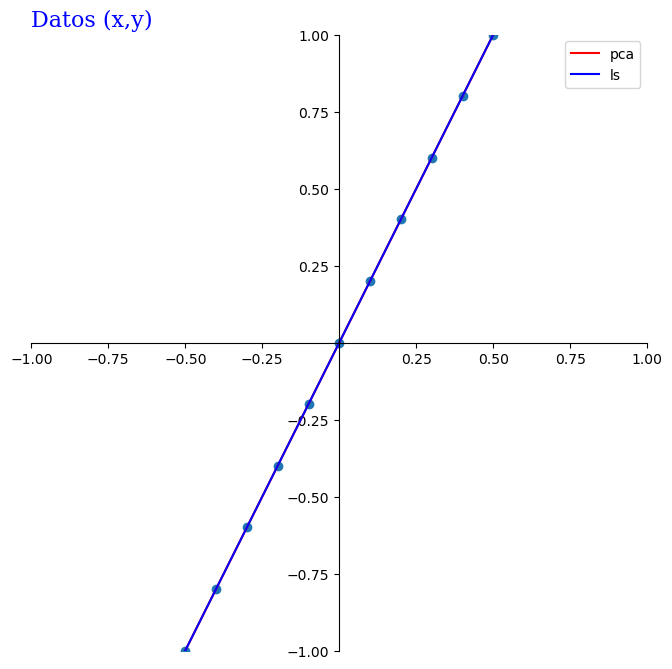

In [ ]:
"""1.
Con X = [0.0; 0.1; 0.2; ... ; 1] e Y = 2X. Aseguremonos que ambas
funciones dan 2 para la pendiente."""

"""Datos"""

x = np.linspace(0.0, 1, 11)
y = 2*x


"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Grafico de los datos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 1.0
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=None)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

In [ ]:
n = 10
s = 0.1
x = np.arange(0.0, 1, 1/n)
y = 2*x + s*np.random.randn(n)
print("x = ", x)
print("y = ", y)

x =  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
y =  [0.05470531 0.04901418 0.32966654 0.60152665 0.92559337 0.91739347
 1.30107042 1.44709741 1.49618958 1.73425871]


autovalores pca =  [0.03327622 0.62089575]
autovectores pca = 
 [[-0.95645896  0.29186686]
 [ 0.29186686  0.95645896]]
pendiente pca =  3.277038615515722
pendiente ls = 1.9684690589505247


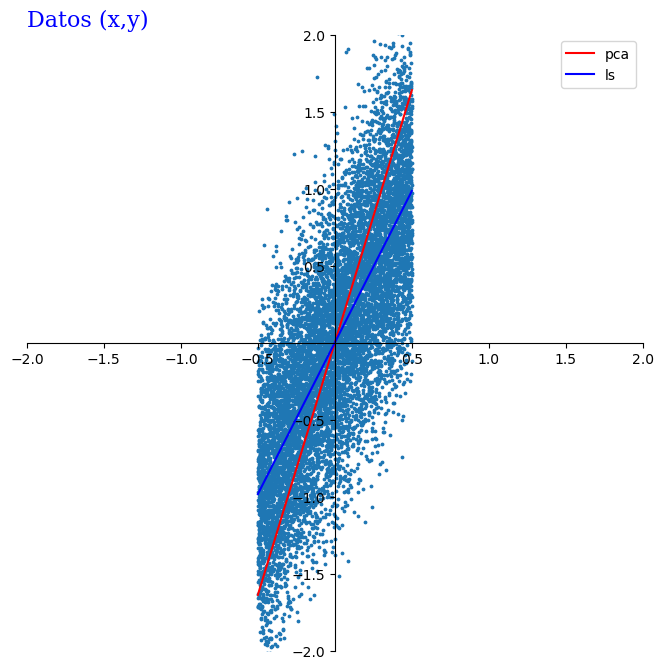

In [ ]:
"""2.a

Consideramos el caso donde x es la variable independiente (también conocida como explicativa),
a la que conocemos perfectamente, pero solo podemos obtener mediciones "ruidosas" de y, o mas
especificamente, con errores de medicion en y que en general se distribuyen de manera normal.

Alternativamente, podemos pensar que y depende de x, y quizas tambien de otras variables que
no estan tenidas en cuenta en el modelo, pero cuyos efectos se pueden simular con una
aleatoriedad Gaussiana.

Fix X = [x1, x2,..., x1000] = [0.001, 0.002, 0.003,..., 1]. xi = i/1000, i = 1,...,1000
yi = 2*xi + Norm(0,s^2) = 2*i/1000, Y = [y1, y2,..., y1000].

1.c.1 Por que pasa lo que pasa en esta celda? """

"""Datos"""

n = 10000
s = 0.5
x = np.arange(0.0, 1, 1/n)
y = 2*x + s*np.random.randn(n)

"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 2.0
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=3)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

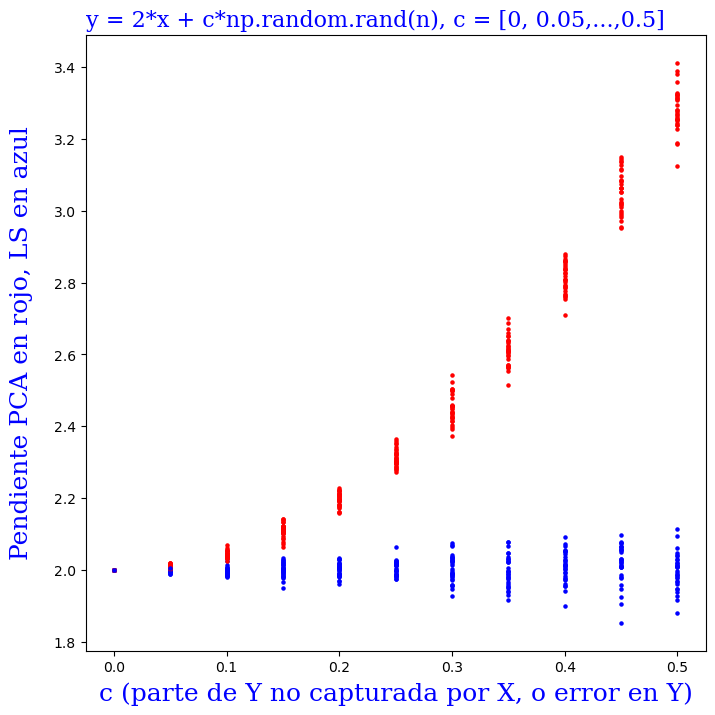

In [ ]:
"""2.b

Para cada s en [0, 0.05, 0.1,..., 0.45, 0.5] calculamos
30 veces la pendiente predicha por pca y ls y hacemos un scatter plot.

De nuevo la misma pregunta, por que pasa lo que pasa? """

"""Preparando el Graficos"""
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlabel("c (parte de Y no capturada por X, o error en Y)", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("Pendiente PCA en rojo, LS en azul", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("y = 2*x + c*np.random.rand(n), c = [0, 0.05,...,0.5]", loc='left',
             fontsize=16, fontname='serif', color="blue")

"""Estudio"""
n = 1000
x = np.arange(1/n, 1+1/n, 1/n)
s = np.linspace(0, 0.5, 11)
prc = np.zeros(11)
regr = np.zeros(11)

for i in range(30):
    count = 0
    for t in s:
        y = 2*x + t*np.random.randn(n)
        w, v, b = pca(x,y)
        c = ls(x,y)
        prc[count] = b
        regr[count] = c
        count += 1
    ax.scatter(s, prc, s=5, c="red")
    ax.scatter(s, regr, s=5, c="blue")


autovalores pca =  [0.03986814 0.46027063]
autovectores pca = 
 [[-0.89596315  0.4441284 ]
 [ 0.4441284   0.89596315]]
pendiente pca =  2.017351610662108
pendiente ls = 1.3623602933208292


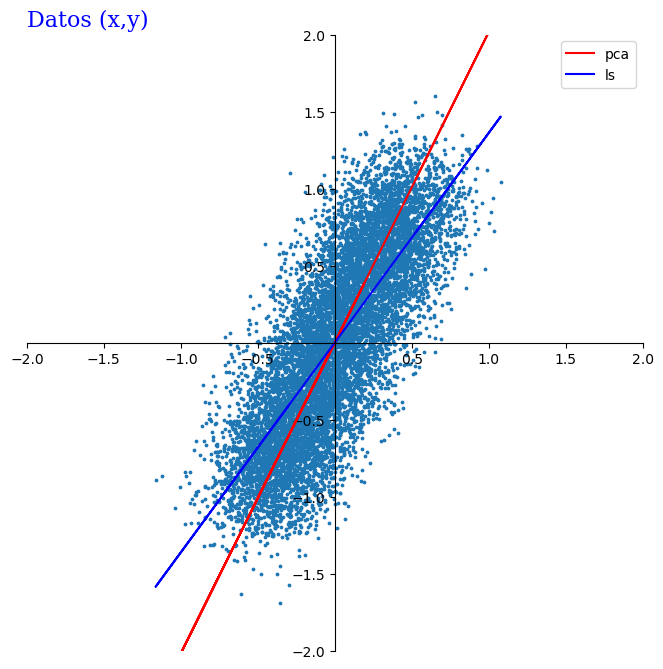

In [ ]:
"""3.a

Ahora consideramos el caso donde para ambas variables, x e y, solo podemos obtener mediciones
"ruidosas", o con errores de medicion en que en general se distribuyen de manera normal para ambas.

Alternativamente, podemos pensar que y depende de x, y quizas tambien de otras variables que
no estan tenidas en cuenta en el modelo, pero cuyos efectos se pueden simular con una
aleatoriedad Gaussiana, y ademas a la variable x la medimos con cierto error que simulamos
como Gaussiano.

Ahora consideremos el caso donde ambos, X e Y tienen ruido
   xi = i/1000 + Norm(0,s^2),  ; yi = 2*xi + Norm(0,s^2), i = 1,...,1000
   X = [x1, x2,..., x1000] , Y = [y1, y2,..., y1000].

   Hacer los mismos estudios que en 2.a"""

"""Datos"""

# jugar con diferentes valores de n y s
n = 10000
s = 0.2
z = np.arange(0.0, 1, 1/n)
x = z + s*np.random.randn(n)
y = 2*z + s*np.random.randn(n)


"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 2
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=3)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

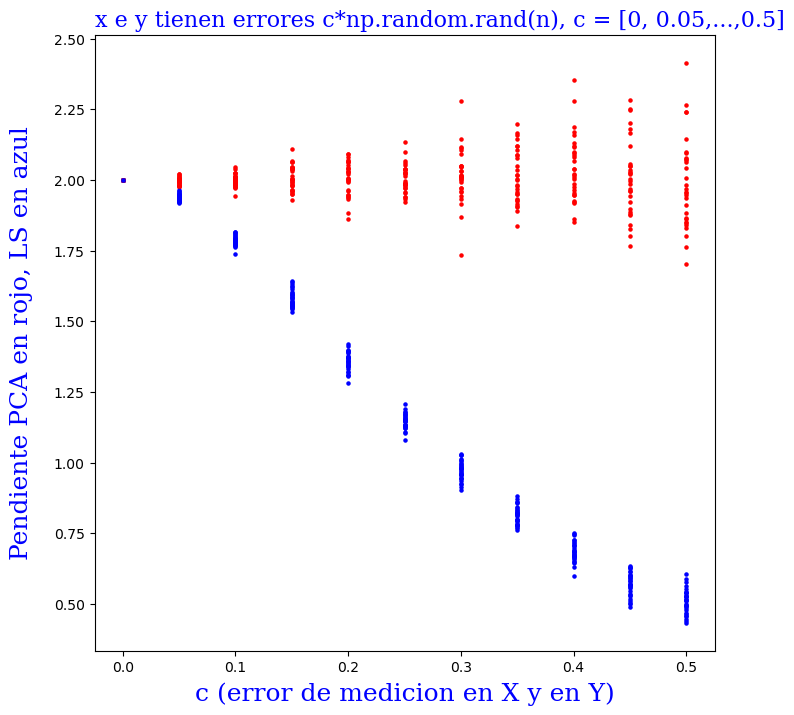

In [ ]:
"""3.b

Preparando el Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlabel("c (error de medicion en X y en Y)", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("Pendiente PCA en rojo, LS en azul", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("x e y tienen errores c*np.random.rand(n), c = [0, 0.05,...,0.5]", loc='left',
             fontsize=16, fontname='serif', color="blue")

"""Estudio"""
n = 1000
z = np.arange(1/n, 1+1/n, 1/n)
s = np.linspace(0, 0.5, 11)
prc = np.zeros(11)
regr = np.zeros(11)

for i in range(30):
    count = 0
    for t in s:
        x = z + t*np.random.randn(n)
        y = 2*z + t*np.random.randn(n)
        w, v, b = pca(x,y)
        c = ls(x,y)
        prc[count] = b
        regr[count] = c
        count += 1
    ax.scatter(s, prc, s=5, c="red")
    ax.scatter(s, regr, s=5, c="blue")

autovalores pca =  [0.08229795 0.0830614 ]
autovectores pca = 
 [[ 0.50296849 -0.86430475]
 [-0.86430475 -0.50296849]]
pendiente pca =  0.5819342046922044
pendiente ls = 0.004005000836781802


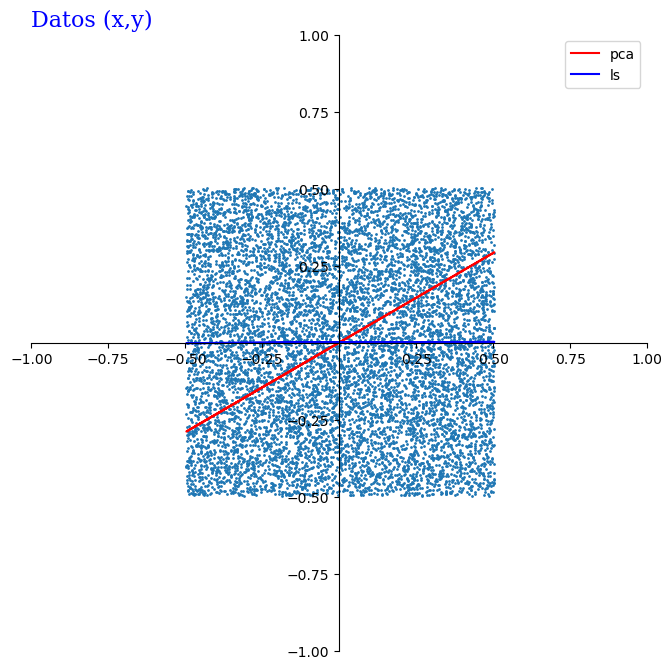

In [ ]:
"""4

Los elementos de X e Y son elegidos al azar de forma idéntica e independiente
(por ejemplo, cada elemento está distribuido uniformemente en el cuadrado [0; 1] x [0; 1]).
Repetir varias veces y mirar los graficos ¿Qué genera PCA y qué  LS?, Por que?

Jugar con el parametro n y s. Tambien pasar de

np.random.rand a np.random.randn (ajustanto l para escalar apropiadamente la region
del grafico)

Por que pasa lo que pasa?"""

"""Datos"""

n = 10000
s = 1.0
x = s*np.random.rand(n,1)
y = np.random.rand(n,1)

"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 1
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=1)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

# ¿Por qué PCA funciona mejor en un estudio y regresiones en el otro?

(2.a) ¿Por qué PCA funciona mal con aleatoriedad solo en Y?

(2.b) ¿Por qué PCA funciona peor cuanto mayor es la aleatoriedad en Y (y solo en Y)?
   
(3.a) ¿Por qué PCA funciona bien con aleatoriedad en X e Y?
   
(3.b) ¿Por qué la regresion funciona mal con aleatoriedad en X e Y? ¿Por qué la regresion funciona peor
      cuanto mas grande es el error en ambas variables?
   
(4) Por que en la "nube cuadrada" pca da cualquier cosa mientras que regresiones siempre da lo mismo?